Index(['OrderNumber', 'QuantityOrdered', 'UnitPrice ', 'OrderLineNumber ',
       'TotalSaleValue', 'OrderDate', 'Status', 'QuarterID', 'Month', 'Year',
       'ProductLine', 'TotalCost', 'ProductCode', 'CustomerName', 'Phone',
       'AddressLine1', 'AddressLine2', 'City', 'State', 'PostalCode',
       'Country', 'Territory', 'ContactLastName', 'ContactFirstName',
       'DealSize'],
      dtype='object')


<ipython-input-6-244817a556e3>:14: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['OrderDate'] = pd.to_datetime(data['OrderDate'])


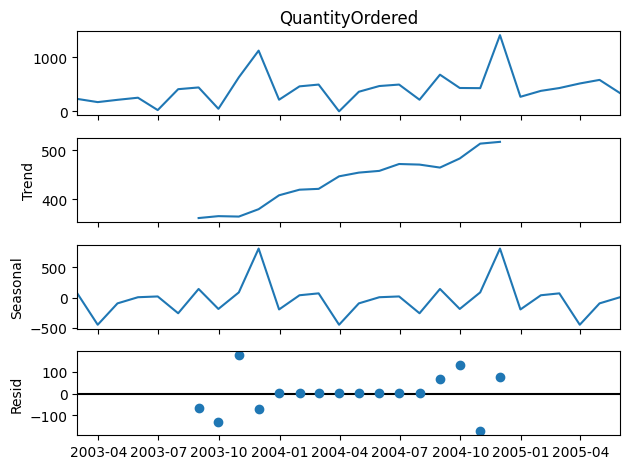

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


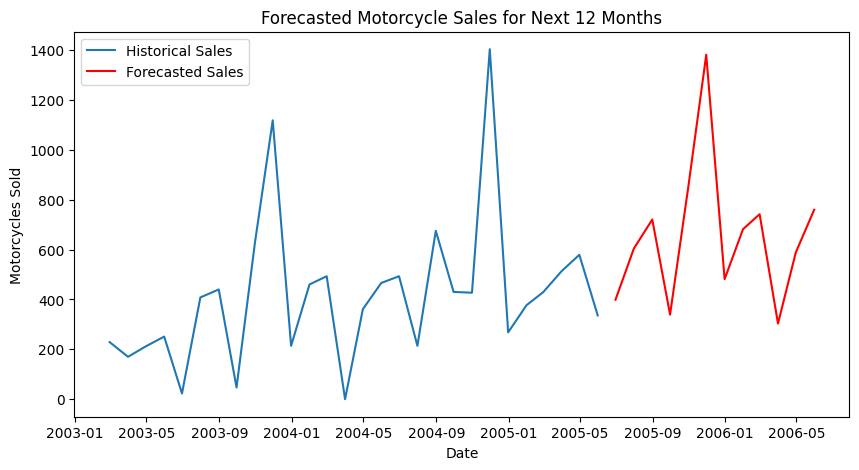

QuantityOrdered         mean     mean_se  mean_ci_lower  mean_ci_upper
2005-06-30        398.754733  128.573154     146.755982     650.753484
2005-07-31        604.287266  128.630234     352.176641     856.397891
2005-08-31        720.332293  132.034692     461.549052     979.115535
2005-09-30        339.245216  131.205055      82.088034     596.402399
2005-10-31        855.275462  131.692151     597.163589    1113.387336
2005-11-30       1380.947197  131.196005    1123.807751    1638.086642
2005-12-31        481.179028  132.069725     222.327124     740.030932
2006-01-31        681.473323  128.010814     430.576739     932.369908
2006-02-28        741.692182  126.250768     494.245225     989.139140
2006-03-31        303.382181  126.199201      56.036293     550.728070
2006-04-30        588.344933  126.181556     341.033627     835.656238
2006-05-31        759.297110  126.270051     511.812358    1006.781863


In [6]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Loading Dataset
file_path = '/content/drive/MyDrive/cleaned_Excel_Data.csv'
data = pd.read_csv(file_path, encoding='ISO-8859-1')

# Display the column names
print(data.columns)

# Converted OrderDate to datetime and set it as the index
data['OrderDate'] = pd.to_datetime(data['OrderDate'])
data.set_index('OrderDate', inplace=True)

# Filter for Motorcycle sales
motorcycle_data = data[data['ProductLine'] == 'Motorcycles']

# Resample data to get monthly sales totals
monthly_sales = motorcycle_data['QuantityOrdered'].resample('M').sum()

# Removed Null values
decomposition = seasonal_decompose(monthly_sales.dropna(), model='additive')
decomposition.plot()
plt.show()

#  SARIMA Model parameters

p, d, q = 1, 1, 1  # Non-seasonal parameters
P, D, Q, S = 1, 1, 1, 12  # Seasonal parameters, assuming annual seasonality

# Fit the SARIMA model
model = SARIMAX(monthly_sales, order=(p, d, q), seasonal_order=(P, D, Q, S))
results = model.fit(disp=False)

# Forecast the next 12 months
forecast = results.get_forecast(steps=12)
forecast_df = forecast.summary_frame()

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(monthly_sales, label='Historical Sales')
plt.plot(forecast_df['mean'], label='Forecasted Sales', color='red')
plt.title('Forecasted Motorcycle Sales for Next 12 Months')
plt.xlabel('Date')
plt.ylabel('Motorcycles Sold')
plt.legend()
plt.show()

# Print the forecast data
print(forecast_df)


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
